<a href="https://colab.research.google.com/github/Rakshithadhandre/OIBSIP/blob/main/SALES_PREDICTION_USING_PYTHON_TASK5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Advertising.csv")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
dataset.shape

(200, 5)

In [6]:
dataset['Sales'].value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: Sales, Length: 121, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


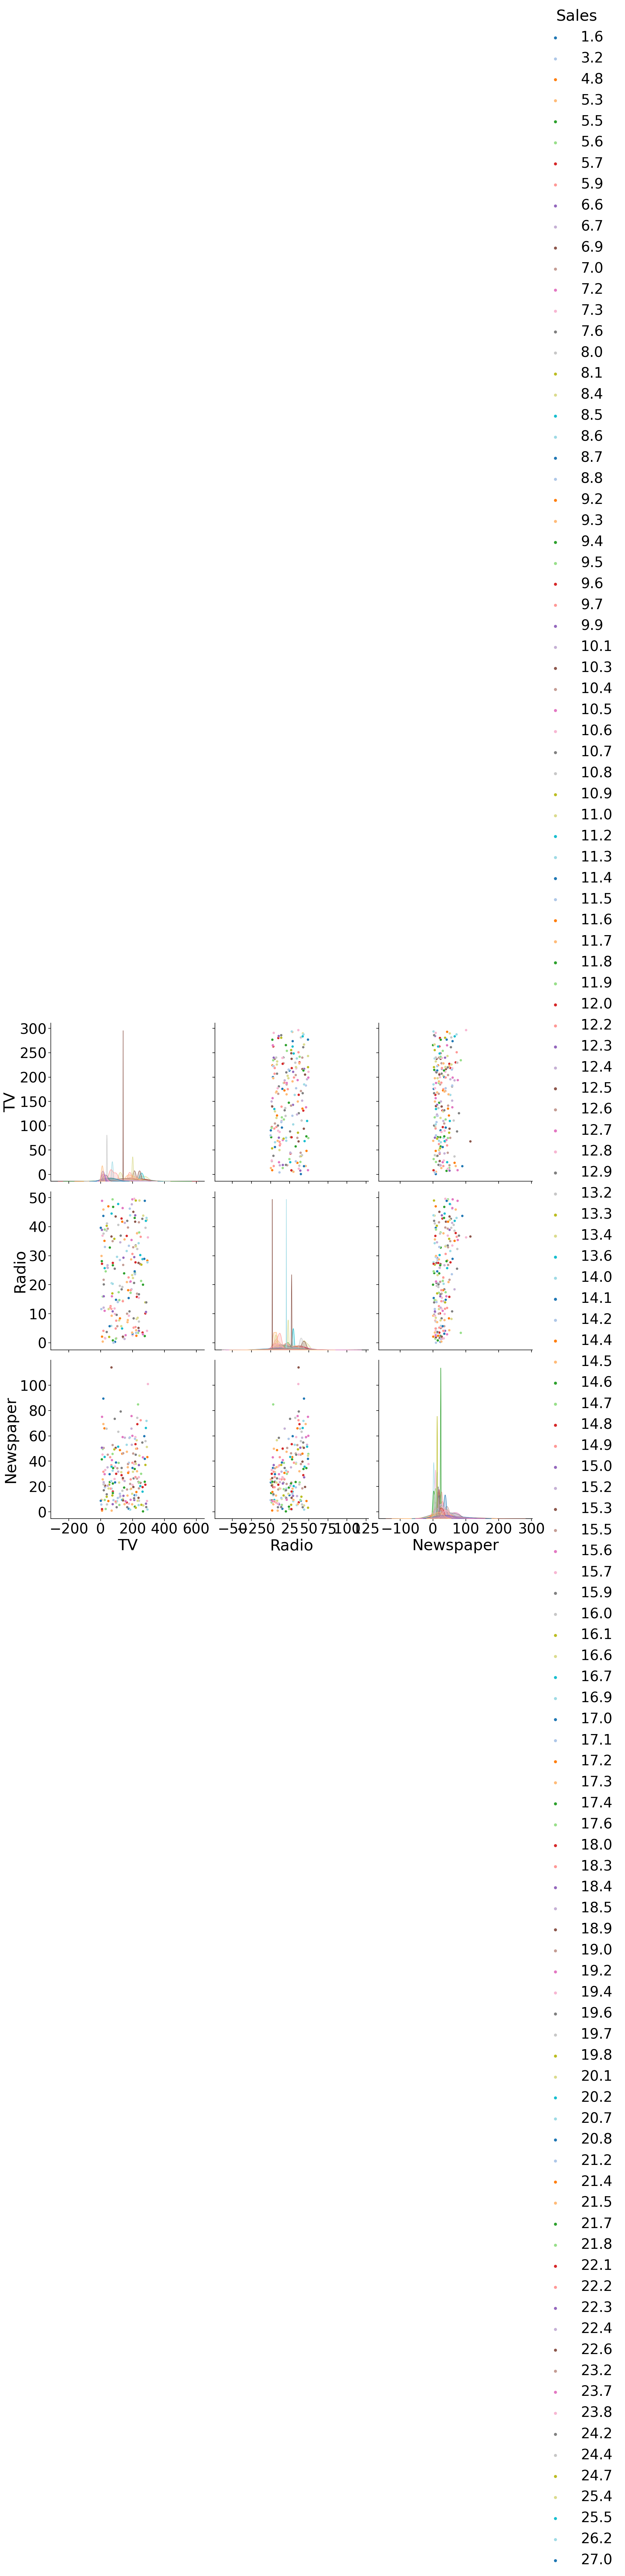

In [28]:
#understandig the distribution with seaborn
with sns.plotting_context("notebook",font_scale=3.0):
  g=sns.pairplot(dataset[['TV','Radio','Newspaper','Sales']],
                 hue='Sales',palette='tab20',size=6)
  

In [8]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1:].values

In [9]:
print(x)

[[  1.  230.1  37.8  69.2]
 [  2.   44.5  39.3  45.1]
 [  3.   17.2  45.9  69.3]
 [  4.  151.5  41.3  58.5]
 [  5.  180.8  10.8  58.4]
 [  6.    8.7  48.9  75. ]
 [  7.   57.5  32.8  23.5]
 [  8.  120.2  19.6  11.6]
 [  9.    8.6   2.1   1. ]
 [ 10.  199.8   2.6  21.2]
 [ 11.   66.1   5.8  24.2]
 [ 12.  214.7  24.    4. ]
 [ 13.   23.8  35.1  65.9]
 [ 14.   97.5   7.6   7.2]
 [ 15.  204.1  32.9  46. ]
 [ 16.  195.4  47.7  52.9]
 [ 17.   67.8  36.6 114. ]
 [ 18.  281.4  39.6  55.8]
 [ 19.   69.2  20.5  18.3]
 [ 20.  147.3  23.9  19.1]
 [ 21.  218.4  27.7  53.4]
 [ 22.  237.4   5.1  23.5]
 [ 23.   13.2  15.9  49.6]
 [ 24.  228.3  16.9  26.2]
 [ 25.   62.3  12.6  18.3]
 [ 26.  262.9   3.5  19.5]
 [ 27.  142.9  29.3  12.6]
 [ 28.  240.1  16.7  22.9]
 [ 29.  248.8  27.1  22.9]
 [ 30.   70.6  16.   40.8]
 [ 31.  292.9  28.3  43.2]
 [ 32.  112.9  17.4  38.6]
 [ 33.   97.2   1.5  30. ]
 [ 34.  265.6  20.    0.3]
 [ 35.   95.7   1.4   7.4]
 [ 36.  290.7   4.1   8.5]
 [ 37.  266.9  43.8   5. ]
 

In [10]:
print(y)

[[22.1]
 [10.4]
 [ 9.3]
 [18.5]
 [12.9]
 [ 7.2]
 [11.8]
 [13.2]
 [ 4.8]
 [10.6]
 [ 8.6]
 [17.4]
 [ 9.2]
 [ 9.7]
 [19. ]
 [22.4]
 [12.5]
 [24.4]
 [11.3]
 [14.6]
 [18. ]
 [12.5]
 [ 5.6]
 [15.5]
 [ 9.7]
 [12. ]
 [15. ]
 [15.9]
 [18.9]
 [10.5]
 [21.4]
 [11.9]
 [ 9.6]
 [17.4]
 [ 9.5]
 [12.8]
 [25.4]
 [14.7]
 [10.1]
 [21.5]
 [16.6]
 [17.1]
 [20.7]
 [12.9]
 [ 8.5]
 [14.9]
 [10.6]
 [23.2]
 [14.8]
 [ 9.7]
 [11.4]
 [10.7]
 [22.6]
 [21.2]
 [20.2]
 [23.7]
 [ 5.5]
 [13.2]
 [23.8]
 [18.4]
 [ 8.1]
 [24.2]
 [15.7]
 [14. ]
 [18. ]
 [ 9.3]
 [ 9.5]
 [13.4]
 [18.9]
 [22.3]
 [18.3]
 [12.4]
 [ 8.8]
 [11. ]
 [17. ]
 [ 8.7]
 [ 6.9]
 [14.2]
 [ 5.3]
 [11. ]
 [11.8]
 [12.3]
 [11.3]
 [13.6]
 [21.7]
 [15.2]
 [12. ]
 [16. ]
 [12.9]
 [16.7]
 [11.2]
 [ 7.3]
 [19.4]
 [22.2]
 [11.5]
 [16.9]
 [11.7]
 [15.5]
 [25.4]
 [17.2]
 [11.7]
 [23.8]
 [14.8]
 [14.7]
 [20.7]
 [19.2]
 [ 7.2]
 [ 8.7]
 [ 5.3]
 [19.8]
 [13.4]
 [21.8]
 [14.1]
 [15.9]
 [14.6]
 [12.6]
 [12.2]
 [ 9.4]
 [15.9]
 [ 6.6]
 [15.5]
 [ 7. ]
 [11.6]
 [15.2]
 [19.7]


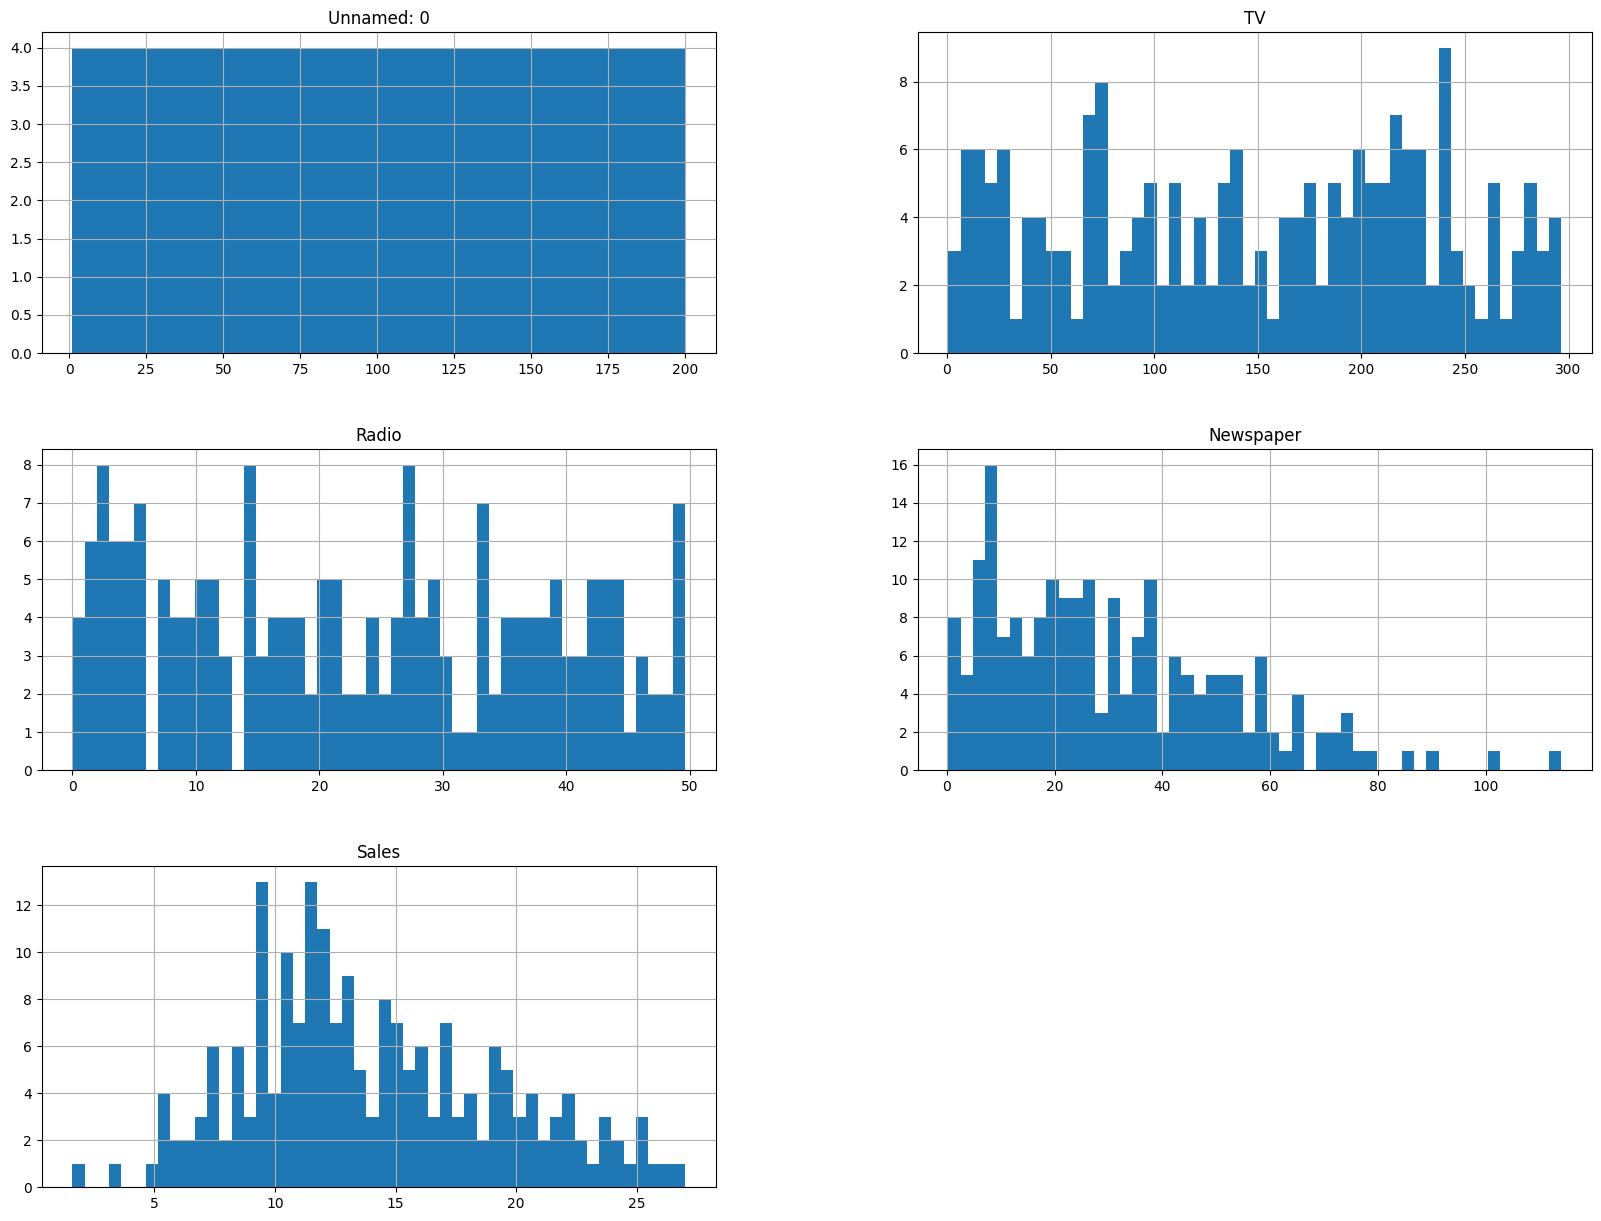

In [11]:
%matplotlib inline
dataset.hist(bins=50,figsize=(20,15))
plt.show()

In [12]:
dataset.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

<Axes: >

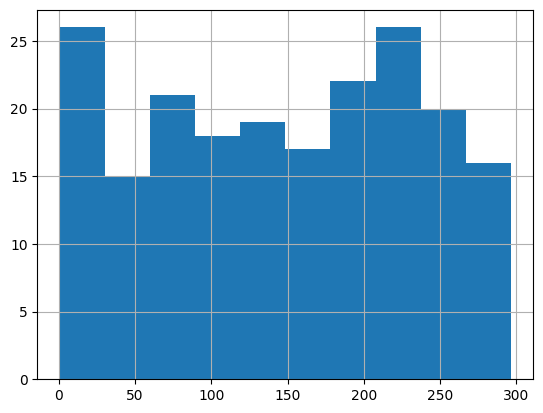

In [14]:
dataset['TV'].hist()

<Axes: >

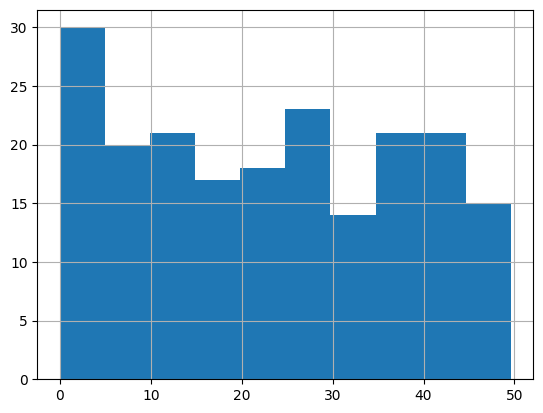

In [ ]:
dataset['Radio'].hist()

<Axes: >

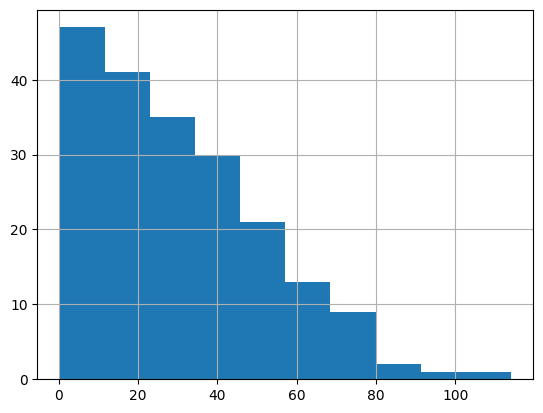

In [ ]:
dataset['Newspaper'].hist()

<Axes: >

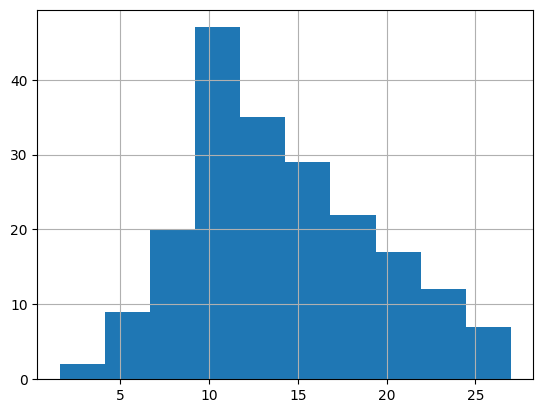

In [ ]:
dataset['Sales'].hist()

In [ ]:
#changing categorical to numerical var
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')#transforming col 3
x=np.array(ct.fit_transform(x))

In [ ]:
print(x)

  (0, 159)	1.0
  (0, 172)	1.0
  (0, 173)	230.1
  (0, 174)	37.8
  (1, 124)	1.0
  (1, 172)	2.0
  (1, 173)	44.5
  (1, 174)	39.3
  (2, 160)	1.0
  (2, 172)	3.0
  (2, 173)	17.2
  (2, 174)	45.9
  (3, 149)	1.0
  (3, 172)	4.0
  (3, 173)	151.5
  (3, 174)	41.3
  (4, 148)	1.0
  (4, 172)	5.0
  (4, 173)	180.8
  (4, 174)	10.8
  (5, 165)	1.0
  (5, 172)	6.0
  (5, 173)	8.7
  (5, 174)	48.9
  (6, 76)	1.0
  :	:
  (193, 174)	42.0
  (194, 19)	1.0
  (194, 172)	195.0
  (194, 173)	149.7
  (194, 174)	35.6
  (195, 44)	1.0
  (195, 172)	196.0
  (195, 173)	38.2
  (195, 174)	3.7
  (196, 23)	1.0
  (196, 172)	197.0
  (196, 173)	94.2
  (196, 174)	4.9
  (197, 20)	1.0
  (197, 172)	198.0
  (197, 173)	177.0
  (197, 174)	9.3
  (198, 158)	1.0
  (198, 172)	199.0
  (198, 173)	283.6
  (198, 174)	42.0
  (199, 27)	1.0
  (199, 172)	200.0
  (199, 173)	232.1
  (199, 174)	8.6


In [19]:
X=dataset.drop('Sales', axis=1)
y=dataset['Sales']

**Split Dataset**

In [16]:
from sklearn.model_selection import train_test_split


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
X_train

,TV,Radio,Newspaper
42,293.6,27.7,1.8
189,18.7,12.1,23.4
90,134.3,4.9,9.3
136,25.6,39.0,9.3
51,100.4,9.6,3.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [30]:
y_train

42     20.7
189     6.7
90     11.2
136     9.5
51     10.7
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: Sales, Length: 134, dtype: float64

In [32]:
X_test

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
...,...,...,...
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5


In [31]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
       ... 
97     15.5
31     11.9
12      9.2
35     12.8
119     6.6
Name: Sales, Length: 66, dtype: float64

**Trainig multiple linear regression model on training set**

In [21]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [22]:
model.fit(X_train,y_train)

LinearRegression()

**Predicting the test results**

In [24]:
y_pred=model.predict(X_test)
np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
print("prediction{}".format(y_pred))


prediction[16.59 21.19 21.67 10.81 22.25 13.31 21.24  7.38 13.44 15.19  9.02  6.57
 14.42  8.94  9.56 12.11  8.86 16.25 10.31 18.84 19.81 13.68 12.45 21.58
  7.67  5.67 20.95 11.89  9.13  8.49 12.32  9.99 21.72 12.65 18.25 20.17
 14.21 21.03 10.92  4.43  9.59 12.53 10.15  8.13 13.33  5.28  9.31 14.15
  8.76 11.67 15.66 11.75 13.22 11.06  6.42  9.85  9.46 24.33  7.69 12.31
 17.58 15.28 11.46 11.12 16.6   6.91]


In [25]:
model.score(X_train,y_train)

0.9095216639030753

In [26]:
model.score(X_test,y_test)

0.8555568430680086